![test](../notebooks/images/header2.png)

# Workshop goals
* Tools
* From logistic regression to neural networks
* API examples
* Train our first neural network model

# How to get and open this file:
1. `git pull`
1. `docker-compose build`
1. `docker-compose up`
1. Open `localhost:8888` in a browser and paste in the token.

# To stop docker:
1. `control-c` to stop Jupyter.
1. `docker-compose down`

# Two main goals:
1. Learn the basics of neural networks and deep learning. Modern [artificial NNs](https://en.wikipedia.org/wiki/Artificial_neural_network) have been around since 1975. We will learn NN vocabulary, what's involved in training a network, common architectures, and types of problems they can be applied to.

2. Learn about [Keras](https://keras.io/) and [Tensorflow](https://www.tensorflow.org/) and how to use them.

We won’t become experts on either subject but will enough to solve many problems and to have the background to learn more advanced techniques.

# Introduction to our software stack


## [Jupyter Notebook](https://www.jupyter.org)

If you can see this you are using it! Jupyter is a web-application for coding, visualations, text, etc. Each code or text chunk lives in a cell. You can run or edit each cell individually in any order. Here are some tips:

* **Alt-Enter** to run a cell.
* You can change a cell to markdown mode with the button above.
* A variable on the last line of cell is automatically printed to screen. A semi-colon will suppress output.
* There are lots of hot-keys.

One caveat with Jupyter notebooks is that it is very easy to lose track of all your variables, or to have the output of a cell not match the code in the cell. It's a good idea to restart the kernal and run all cell before producing a "final" output.

In [1]:
1+1

2

In [2]:
1+1

2

## Git

I’ll be using [Git](https://git-scm.com/) and [Github](https://github.com/) to give you the class materials: pdf of these slides and example code notebooks and other documents. Git with a single committer is the simplest workflow. You’ll get my changes using a git pull command. Check out the Git cheat sheet in the project repo.

<img src="../notebooks/images/git2.png" alt="git workflow" width="700"/>

# Docker

Containers give us a standard environment including a minimal OS and software.

A Dockerfile is like a recipe of software installation and configuration.

We’re using a slightly modified version of the official [Jupyter dockerfiles](https://github.com/jupyter/docker-stacks).

## Our Dockerfile
```bash
# Copyright (c) Jupyter Development Team.
# Distributed under the terms of the Modified BSD License.
FROM jupyter/scipy-notebook

LABEL maintainer="Jupyter Project <jupyter@googlegroups.com>"

# Install Tensorflow
RUN conda install --quiet --yes \
    'tensorflow' \
    'keras' && \
    conda clean -tipsy && \
    fix-permissions $CONDA_DIR && \
    fix-permissions /home/$NB_USER

COPY notebooks/ /home/jovyan/notebooks/
```

### Docker compose
We are using [Docker compose](https://docs.docker.com/compose/overview/) and a YAML file called `docker-compose.yaml` to configure and control our container.

# Keras and Tensorflow

[Tensorflow](https://www.tensorflow.org/) is a numeric computation library commonly used for deep learning.

[Keras](https://keras.io/) is a more user-friendly front-end api for DL framworks, including Tensorflow.

<img src="../notebooks/images/keras_tf.png" alt="drawing" width="400"/>

# Logistic regression ...

## As an equation
Let's take a look at how we can solve a binary (True/False or 0/1) classification problem using logisitc regression.

This is a linear model, in that we take a linear combination of our n features $x$, along with unknown weights $\beta$ for each feature (plus a intercept term):

$$
\Large
\beta_0~+~\beta_1 \cdot x_1~+\dots+\beta_n \cdot x_n
$$

This can have any range of values - we need to "squish" this into the range (0,1), so we put it through the sigmoid function:

$$
\Large
\frac{1}{1 + e^{-x}}
$$


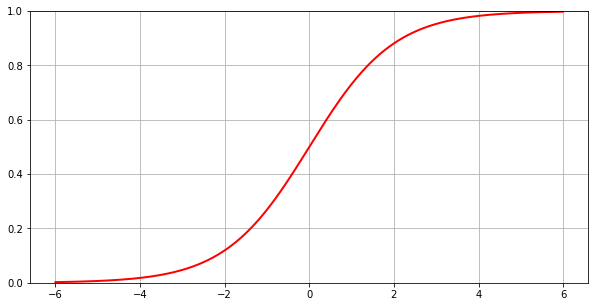

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

x = np.arange(-6, 6, .01)

plt.figure(figsize=(10,5))
plt.plot(x, sigmoid(x), color='red', lw=2)
plt.ylim((0,1))
plt.grid(True)
plt.show()

Which gives us this:

$$
\Large
y = \frac{1}{1 + e^{-(\beta_0~+~\beta_1 \cdot x_1~+\dots+\beta_n \cdot x_n)}}
$$

If y is > 0.5 => classify as a 1 (or True).

If y is < 0.5 => classify as a 0 (or False).



## As a graph

<img src="../notebooks/images/logreg2.png" alt="drawing" width="500"/>

The "learning" in machine learning comes the procedure of checking our predictions versus the real answers, and then adjusting the weights in a direction that decreases the error rate. For logistic regression this is pretty straightforward calculus.

Training more-or-less:
* Calculate the gradient of the error (aka cost or loss function)
* Multiply by a learning rate
* Subtract from the weights $\beta$

This process is done iteratively until convergence:

<img src="images/logreg2_feedback.png" alt="drawing" width="500"/>

This is a single layer neural network! Also called a [Perceptron](https://en.wikipedia.org/wiki/Perceptron)!

## Feedforward Network

### Adding layers

However, there's no reason we can't have one or more extra layers. These layers are called hidden layers.

Note: I'm no longer going to draw the weights ($\beta$) or the bias term - but they are still there!

<img src="../notebooks/images/1hiddenlayer.png" alt="drawing" width="600"/>

# Plotting the output of single neuron

In [4]:
from ipywidgets import interact
import numpy as np
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column, row, layout
from bokeh.models import Range1d
output_notebook()

x = np.linspace(-10, 10, 2000)
y = sigmoid(1+x)

p = figure(title="Single Neuron Output", plot_height=300, plot_width=400, y_range=(-.25,1.25),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=3, alpha=1)

def update(bias=1, weight=1):
    r.data_source.data['y'] = sigmoid(bias+weight*x)
    push_notebook()
    
show(p, notebook_handle=True)
interact(update,bias=(-25.0,25.0), weight=(-25.0,25.0));

Loading BokehJS ...

interactive(children=(FloatSlider(value=1.0, description='bias', max=25.0, min=-25.0), FloatSlider(value=1.0, …

What are effects of moving the sliders? Are the effects independent?

## Neural networks can approximate any function

In fact, a single hidden layer can approximate any function (with some caveats). This is the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem). 

This is a key feature of neural networks and there's fairly simple way to see why this is true. I'll be following a version of this argument from [this cool page](http://neuralnetworksanddeeplearning.com/chap4.html).

In order to make this argument, I'm going to very slightly change the parameterization of the above graph. We found that we could manipulate the weight to make the output look like a step function. And the bias could then be adjusted to change the x position of the step function. However, there's an interaction where it's actually the combination $-b/w$ that controls the x position.

Let's change the equation a bit:

$$
\Large
\mathrm{bias} + \mathrm{weight}\cdot x = \mathrm{weight} \cdot (-s+x)
$$

We can set the weight to a high value and then only have to adjust one parameter.

In [5]:
output_notebook()

weight = 50
x = np.linspace(-5, 5, 200)
y = sigmoid(weight*(0+x))

p = figure(title="Single Neuron Output (high weight)", plot_height=300, plot_width=400, y_range=(-.25,1.25),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=3, alpha=1)

def update(s=0):
    r.data_source.data['y'] = sigmoid(weight*(-s+x))
    push_notebook()
    
show(p, notebook_handle=True)
interact(update, s=(-5.00,5.00));

Loading BokehJS ...

interactive(children=(FloatSlider(value=0.0, description='s', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

Now consider the following neural network with a hidden layer with two neurons. 

<img src="../notebooks/images/universal.png" alt="drawing" width="600"/>

In [6]:
from ipywidgets import interact
import numpy as np
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Range1d
output_notebook()

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

weight = 50
x = np.linspace(-5, 5, 200)
y1 = sigmoid(weight*(0+x))
y2 = sigmoid(-weight*(0+x))
y3 = sigmoid(weight*(0+x) + -weight*(0+x))

p1 = figure(title="First Single Neuron", plot_height=200, plot_width=400, y_range=(-.25,1.25),
           background_fill_color='#efefef')
r1 = p1.line(x, y1, color="#8888cc", line_width=3, alpha=1)

p2 = figure(title="Second Neuron Output (high weight)", plot_height=200, plot_width=400, y_range=(-.25,1.25),
           background_fill_color='#efefef')
r2 = p2.line(x, y2, color="#8888cc", line_width=3, alpha=1)

p3 = figure(title="Weighted Sum with bias", plot_height=300, plot_width=800, y_range=(-3.25,3.25),
           background_fill_color='#efefef')
r3 = p3.line(x, y3, color="#8888cc", line_width=3, alpha=1)

def update(s1=0, s2=1, output_weight=1):
    first_neuron = sigmoid(weight*(-s1+x))
    second_neuron = sigmoid(-weight*(-s2+x))
    output_neuron = output_weight*first_neuron + output_weight*second_neuron
    if output_weight >= 0:
        bias = min(output_weight*first_neuron + output_weight*second_neuron)
    else:
        bias = max(output_weight*first_neuron + output_weight*second_neuron)
    output_neuron = output_neuron - bias
    r1.data_source.data['y'] = first_neuron
    r2.data_source.data['y'] = second_neuron
    r3.data_source.data['y'] = output_neuron
    push_notebook()
      
l = layout([
  [p1, p2],
  [p3],
])
   
show(l, notebook_handle=True)
interact(update, s1=(-5.00,5.00), s2=(-5.00,5.00), output_weight=(-3.00,3.00));

Loading BokehJS ...

interactive(children=(FloatSlider(value=0.0, description='s1', max=5.0, min=-5.0), FloatSlider(value=1.0, desc…

The key takeaway is that we can use two neurons to crate a square well of any thickness and height. Take a large number of neuron pairs, we can approximate any function. [Image source](https://en.wikipedia.org/wiki/Integral#/media/File:Integral_approximations.svg)

<img src="../notebooks/images/Integral_approximations.svg.png" alt="drawing" width="400"/>

A few other points:
1. This argument can be extended into more dimensions. Most problems have more than 1 feature!
1. So far, we have been working with the input into the final neuron. Of course, we are actually interested in the output of that neuron. We can always apply the inverse of the activation function to the function we are trying to model.
1. Just because a neural network CAN approximate any function doesn't mean that it is easy to find the right weights for that approximation.

## What about multiclass classification?
Examples: Identify a fruit from an image, identify handwritten digits (MNIST).

What we've done so far has a binary output. We can also have multiple output nodes, each representing a single class. For each observation, which ever output node has the highest probability "wins" and we assign that class to the observation.

<img src="../notebooks/images/multiclass.png" alt="drawing" width="600"/>

## Note about model complexity

Remember that each line is a weight that has to be learned. Models can very quickly get complex. We can easily have thousands of input features, multiple hidden layers with hundreds of nodes, leading to millions of values that have to be learned. 

Next time:
1. How do we actually train a neural network?
1. What is an activation function and how do I choose one?
1. What is a loss function and which do I choose?


# Your first model
## MNIST
MNIST is a database of handwritten digist (0-9). We'll use these images as inputs to your first model. Let's take a look at the data.

In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers

Using TensorFlow backend.


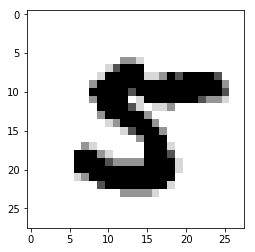

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[1245], cmap='Greys');

In [9]:
train_images[1245].shape

(28, 28)

In [10]:
train_images[1245];

## Prepare the data
We need to do two things:
1. "Unroll" the data into a linear array
2. Scale the data into the range (0,1).

In [11]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
# train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to turn the labels into a form that Keras expects, which is a binary matrix.

In [12]:
train_labels[0]

5

In [13]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Create a Sequential Model and add layers
The [Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/) allows us to define linear layers of a network. It takes care of building the connections between each layer. For the first layer we have to tell it how many inputs to expect. The final layer should have the same number neurons as we have classes.

We are using the[Keras Dense function](https://keras.io/layers/core/) to create exactly the type of layer that we discussed above. The dense refers to the fact that each neuron in the layer is connected to all others in the layer before and after.

A dense layer is also called a **fully-connected layer**.

In [15]:
network = models.Sequential()
network.add(layers.Dense(512, activation='softmax', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


This step sets training parameters for our network. 

In [16]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

And this trains the model. An **epoch** is one full iteration through the data. The **batch size** is the number of observations that go into each training step.

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=256);

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 2.0587 - acc: 0.6749
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 1.7131 - acc: 0.7538
Epoch 3/5
60000/60000 [==============================] - 4s 65us/step - loss: 1.4270 - acc: 0.7964
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 1.1775 - acc: 0.8217
Epoch 5/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.9647 - acc: 0.8420


Of course, we are more interested in test performance.

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 48us/step
test_acc: 0.837


You now have all the pieces you need to create and train a neural network.

Try to create the most accurate MNIST classifier you can. Here are some things to try.
* Add hidden layers.
* Change the number of neurons in the hidden layers.
* Change the batch size or number of epochs.
* Change activation functions - try `tanh` and `relu`.

# More resources:
* [Deep Learning Book](https://www.deeplearningbook.org/) for a in-depth look at DL.
* [Deep Learning with Python](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438) is a good resource for Keras, not as much for deep learning.
* http://neuralnetworksanddeeplearning.com is the source for the universal approximation section.
* [Neural Network Zoo](http://www.asimovinstitute.org/neural-network-zoo/#) gives you a hint of the variety of layers and architectures out there.
* [Coursera ML Class](https://www.coursera.org/learn/machine-learning) The week 5 lectures are all about neural networks.
* [https://www.fast.ai/](https://www.fast.ai/) also has deep learning classes.
